In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize 

In [2]:
df = pd.read_csv('./data/combinded_condensed.csv')

In [3]:
df.head()

,subreddit,permalink,selftext,title
0,LifeProTips,/r/LifeProTips/comments/u9wftb/lpt_dont_drive_...,NaN,LPT: Don’t drive yourself mad trying to “live ...
1,LifeProTips,/r/LifeProTips/comments/u9wdtc/lpt_request_it/,"Whenever you start a new job, let them know yo...",LPT: Request it.
2,LifeProTips,/r/LifeProTips/comments/u9vhmd/lpt_do_not_list...,Unless you absolutely know what tf you're doin...,"LPT: DO NOT list a minor as the POD ""Payable O..."
3,LifeProTips,/r/LifeProTips/comments/u9vgku/lpt_the_perfect...,Don’t you just love cupcakes but hate having t...,LPT: The perfect way to eat a cupcake is to ge...
4,LifeProTips,/r/LifeProTips/comments/u9vf15/lpt_if_youre_ba...,Thank me later. Rest In Peace bananas. :(,LPT: If you’re baking something and it’s takin...


In [105]:
def StringCleaning(df, column):
    lemmatizer = WordNetLemmatizer()
    lemmatized_rows = []
    word_lengths = []
    post_lengths = []
    
    for i, row in df.iterrows():
        word_length = []
        lem_words = []
        words = word_tokenize(row[column])
        post_lengths.append(len(words))
        
        for word in words:
            word = lemmatizer.lemmatize(word)
            lem_words.append(word)
            word_length.append(len(word))
        
        lemmatized_row = ' '.join([str(w) for w in lem_words])
        lemmatized_rows.append(lemmatized_row)
        word_lengths.append(np.array(word_length).mean())
        
    return lemmatized_rows, word_lengths, post_lengths

In [5]:
df['title'], df['avg_title_word_length'], df['title_word_count'] = StringCleaning(df, 'title')

In [76]:
X = df[['title', 'avg_title_word_length', 'title_word_count']]
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1357)

cv2 = CountVectorizer(stop_words=['ulpt', 'lpt'])
cv2.fit(X_train['title'])

X_train_cv2 = pd.DataFrame(cv2.transform(X_train['title']).A, columns=cv2.get_feature_names_out())
X_train_cv2['avg_title_word_length'] = X_train['avg_title_word_length'].values
X_train_cv2['title_word_count'] = X_train['title_word_count'].values

X_test_cv2 = pd.DataFrame(cv2.transform(X_test['title']).A, columns=cv2.get_feature_names_out())
X_test_cv2['avg_title_word_length'] = X_test['avg_title_word_length'].values
X_test_cv2['title_word_count'] = X_test['title_word_count'].values

In [94]:
lr2 = LogisticRegression(max_iter=10_000, n_jobs=-1, random_state=1357)
lr2.fit(X_train_cv2, y_train)


C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- 000 15
- 000 biden
- 000 brandon
- 000 by
- 000 last
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 9847 features, but LogisticRegression is expecting 76026 features as input.

In [95]:
print(lr2.score(X_train_cv2, y_train), lr2.score(X_test_cv2, y_test))

0.958451752605224 0.8198051948051948


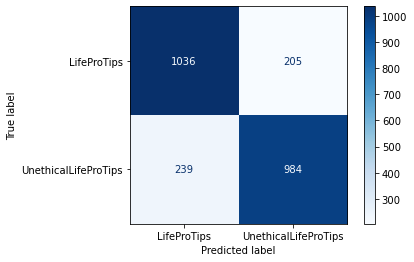

In [81]:
ConfusionMatrixDisplay.from_estimator(lr2, X_test_cv2, y_test, cmap='Blues');

In [73]:
X = df[['title', 'avg_title_word_length', 'title_word_count']]
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1357)

cv = CountVectorizer(stop_words=['ulpt', 'lpt'], ngram_range=(1,2))
cv.fit(X_train['title'])

X_train_cv = pd.DataFrame(cv.transform(X_train['title']).A, columns=cv.get_feature_names_out())
X_train_cv['avg_title_word_length'] = X_train['avg_title_word_length'].values
X_train_cv['title_word_count'] = X_train['title_word_count'].values

X_test_cv = pd.DataFrame(cv.transform(X_test['title']).A, columns=cv.get_feature_names_out())
X_test_cv['avg_title_word_length'] = X_test['avg_title_word_length'].values
X_test_cv['title_word_count'] = X_test['title_word_count'].values

In [74]:
lr = LogisticRegression(max_iter=10_000, n_jobs=-1, random_state=1357)
lr.fit(X_train_cv, y_train)
print(lr.score(X_train_cv, y_train), lr.score(X_test_cv, y_test))

0.995263229124374 0.833198051948052


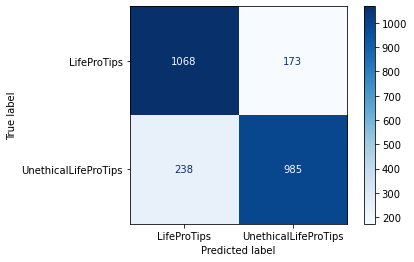

In [75]:
ConfusionMatrixDisplay.from_estimator(lr,X_test_cv, y_test, cmap='Blues');

In [113]:
X = df['title']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1357)

cv3 = CountVectorizer(stop_words=['ulpt', 'lpt'], ngram_range=(1,2))
cv3.fit(X_train)

X_train_cv3 = pd.DataFrame(cv3.transform(X_train).A, columns=cv3.get_feature_names_out())
X_test_cv3 = pd.DataFrame(cv3.transform(X_test).A, columns=cv3.get_feature_names_out())


In [101]:
lr3 = LogisticRegression(max_iter=10_000, n_jobs=-1, random_state=1357)
lr3.fit(X_train_cv3, y_train)
print(lr3.score(X_train_cv3, y_train), lr3.score(X_test_cv3, y_test))

0.9958045743673027 0.833198051948052


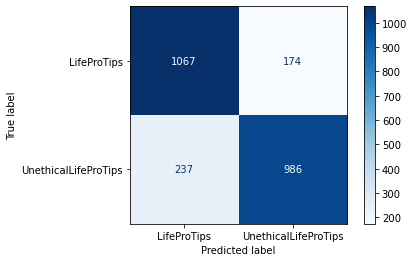

In [103]:
# interestingly we achieve the same results on our test set but posts are shifted around
ConfusionMatrixDisplay.from_estimator(lr3,X_test_cv3, y_test, cmap='Blues');

In [123]:
# actual subreddit - ULPT
sentence = "When you borrow your friends phone check for money in the back. Some people keep extracash there for emergencies. They won't realize it's gone until there is an emergency and likely won't realize you took it."
words = word_tokenize(sentence)
lem_words = []
lemmatizer = WordNetLemmatizer()

for word in words:
    word = lemmatizer.lemmatize(word)
    lem_words.append(word)
    
lemmatized_row = ' '.join([str(w) for w in lem_words])
temp_dict = {'title': lemmatized_row}
cv3.transform(temp_dict)
lr3.predict_proba(cv3.transform(temp_dict))

C:\Users\David\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.58164064, 0.41835936]])

In [124]:
# actual subreddit - LPT
sentence = "Keep some money in the back of your phone. We carry our phone everywhere so put some ($20-50) in the back case and forget. This money will come in hand if you don't have your wallet and need some emergency cash"
words = word_tokenize(sentence)
lem_words = []
lemmatizer = WordNetLemmatizer()

for word in words:
    word = lemmatizer.lemmatize(word)
    lem_words.append(word)
    
lemmatized_row = ' '.join([str(w) for w in lem_words])
temp_dict = {'title': lemmatized_row}
cv3.transform(temp_dict)
lr3.predict_proba(cv3.transform(temp_dict))

array([[0.58164064, 0.41835936]])